In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [3]:
por = "Resources of CSV files/HourlyWeatherPortlandMerged.csv"

In [4]:
df = pd.read_csv(por)

In [5]:
df.head()

,Unnamed: 0,dt,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,...,weather_icon,avg_temp_f,weather_type,date,Average Trip Duration,Amount of Rides,Subscribers,Non Subscribers,Subscriber %,Non Subscriber %
0,0,1514764800,2018-01-01 00:00:00,4975802,255.62,253.15,257.15,1019,59,5,...,01n,0.446,1,2018-01-01,13.882353,17.0,8.0,9.0,47.0,53.0
1,1,1514768400,2018-01-01 01:00:00,4975802,254.26,250.15,256.15,1019,54,3,...,01n,-2.002,1,2018-01-01,15.400000,20.0,11.0,9.0,55.0,45.0
2,2,1514772000,2018-01-01 02:00:00,4975802,255.14,254.15,256.15,1020,59,3,...,01n,-0.418,1,2018-01-01,17.000000,5.0,3.0,2.0,60.0,40.0
3,3,1514775600,2018-01-01 03:00:00,4975802,254.14,253.15,255.15,1020,58,1,...,01n,-2.218,1,2018-01-01,32.000000,1.0,1.0,0.0,100.0,0.0
4,4,1514779200,2018-01-01 04:00:00,4975802,253.73,252.15,255.15,1020,53,2,...,01n,-2.956,1,2018-01-01,14.500000,2.0,2.0,0.0,100.0,0.0


<IPython.core.display.Javascript object>


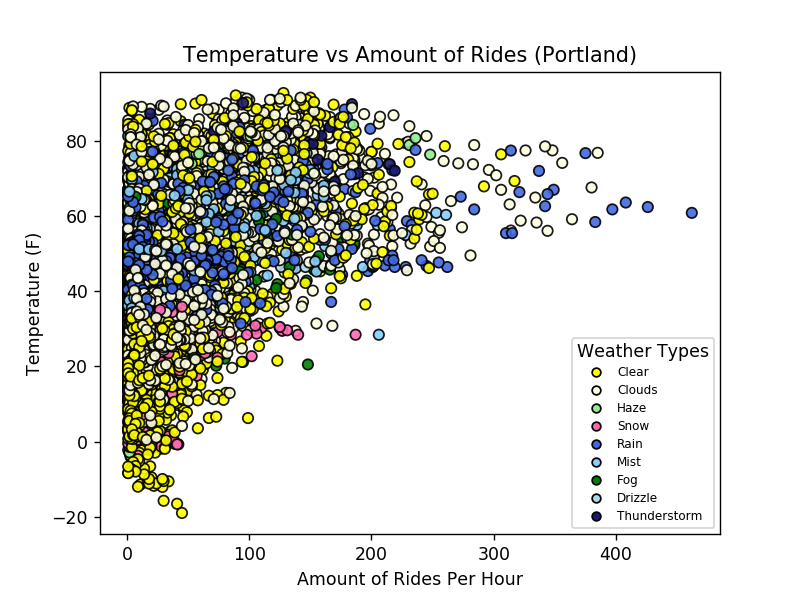

In [10]:
temp = []
rides = []
duration = []
color = []
for row in df['avg_temp_f']:
    temp.append(row)
    
for row in df['Amount of Rides']:   
    rides.append(row)
    
for row in df['Average Trip Duration']: 
    duration.append(row)


col_dict = {1:'yellow', 2:'lightyellow', 3:'lightblue', 
            4:'green', 5:'lightgreen', 6:'lightskyblue',
            7:'royalblue', 8:'hotpink', 9:'midnightblue'} 

weather_dict = {1:"Clear", 2:"Clouds", 3:"Drizzle", 
            4:"Fog", 5:"Haze", 6:"Mist",
            7:"Rain", 8:"Snow", 9:"Thunderstorm"}

df['Color'] = df['weather_type'].map(col_dict) 
df['Weather Name'] = df['weather_type'].map(weather_dict)
    
plt.scatter(rides, temp, marker="o", 
            c=df.Color,
            edgecolors="black", 
            alpha=.9, label=df.Color)
plt.title("Temperature vs Amount of Rides (Portland)")
plt.xlabel("Amount of Rides Per Hour")
plt.ylabel("Temperature (F)")

colors_list=list(df['Color'].unique()) 
weather_list=list(df['Weather Name'].unique())

patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec="Black", color=colors_list[i], 
            label="{:s}".format(weather_list[i]) )[0]  for i in range(len(weather_list)) ]

plt.legend(title="Weather Types", handles=patches, loc='best',fontsize='x-small')
plt.savefig("Visualizations/Port_Temp_Scat.png")
